In [8]:
# Proyek Analisis Data: Air Quality
# Nama: Devid Laritsan Manurung
# Email: manurungdevid2004@gmail.com
# ID Dicoding: hi_itsyourdave

# Import Library
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Data Wrangling
## Gathering Data

Dataset yang digunakan untuk proyek ini adalah dataset kualitas udara dari berbagai distrik yang dapat diakses melalui [tautan ini](https://github.com/marceloreis/HTI/tree/master/PRSA_Data_20130301-20170228). Dataset ini memuat data dari 12 distrik dalam rentang waktu 2013 hingga 2017.


In [9]:
# Menggunakan os untuk mendapatkan list dataset CSV
dataset_list = os.listdir('data')
dataframes = []

# Membaca setiap CSV dan menyimpannya dalam list dataframes
for file in dataset_list:
    dataframes.append(pd.read_csv(os.path.join('data', file)))

# Unwrapping dataframes ke dalam variabel individual untuk mempermudah analisis
aotizhongxin_df, changping_df, dingling_df, dongsi_df, guanyuan_df, gucheng_df, huairou_df, nongzhanguan_df, shunyi_df, tiantan_df, wanliu_df, wanshouxigong_df = dataframes


## Assessing Data

Pada tahap ini, kita akan mengevaluasi setiap DataFrame untuk memeriksa informasi, data kosong, dan duplikasi.


In [10]:
# Memeriksa informasi dan data kosong pada masing-masing DataFrame
aotizhongxin_df.info(), aotizhongxin_df.isna().sum(), aotizhongxin_df.duplicated().sum()
changping_df.info(), changping_df.isna().sum(), changping_df.duplicated().sum()
dingling_df.info(), dingling_df.isna().sum(), dingling_df.duplicated().sum()
dongsi_df.info(), dongsi_df.isna().sum(), dongsi_df.duplicated().sum()
guanyuan_df.info(), guanyuan_df.isna().sum(), guanyuan_df.duplicated().sum()
gucheng_df.info(), gucheng_df.isna().sum(), gucheng_df.duplicated().sum()
huairou_df.info(), huairou_df.isna().sum(), huairou_df.duplicated().sum()
nongzhanguan_df.info(), nongzhanguan_df.isna().sum(), nongzhanguan_df.duplicated().sum()
shunyi_df.info(), shunyi_df.isna().sum(), shunyi_df.duplicated().sum()
tiantan_df.info(), tiantan_df.isna().sum(), tiantan_df.duplicated().sum()
wanliu_df.info(), wanliu_df.isna().sum(), wanliu_df.duplicated().sum()
wanshouxigong_df.info(), wanshouxigong_df.isna().sum(), wanshouxigong_df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 t

(None,
 No            0
 year          0
 month         0
 day           0
 hour          0
 PM2.5       696
 PM10        484
 SO2         669
 NO2         754
 CO         1297
 O3         1078
 TEMP         19
 PRES         19
 DEWP         19
 RAIN         19
 wd           79
 WSPM         13
 station       0
 dtype: int64,
 np.int64(0))

# Data Cleaning

Pembersihan data dilakukan dengan menginterpolasi nilai kosong dan mengimputasi data untuk kolom tertentu.


In [11]:
# Interpolasi untuk mengisi nilai kosong pada kolom numerik
def interpolate_data(df):
    return df.interpolate(method='linear')

# Interpolasi pada setiap DataFrame
aotizhongxin_df = interpolate_data(aotizhongxin_df)
changping_df = interpolate_data(changping_df)
dingling_df = interpolate_data(dingling_df)
dongsi_df = interpolate_data(dongsi_df)
guanyuan_df = interpolate_data(guanyuan_df)
gucheng_df = interpolate_data(gucheng_df)
huairou_df = interpolate_data(huairou_df)
nongzhanguan_df = interpolate_data(nongzhanguan_df)
shunyi_df = interpolate_data(shunyi_df)
tiantan_df = interpolate_data(tiantan_df)
wanliu_df = interpolate_data(wanliu_df)
wanshouxigong_df = interpolate_data(wanshouxigong_df)

# Imputasi nilai kosong untuk kolom 'wd' dengan modus
def impute_wd(df, value):
    df['wd'].fillna(value=value, inplace=True)

# Imputasi data untuk kolom 'wd' pada setiap DataFrame
aotizhongxin_df['wd'].value_counts(), impute_wd(aotizhongxin_df, 'NA')
changping_df['wd'].value_counts(), impute_wd(changping_df, 'NNW')
dingling_df['wd'].value_counts(), impute_wd(dingling_df, 'NNW')
dongsi_df['wd'].value_counts(), impute_wd(dongsi_df, 'ENE')
guanyuan_df['wd'].value_counts(), impute_wd(guanyuan_df, 'NE')
gucheng_df['wd'].value_counts(), impute_wd(gucheng_df, 'N')
huairou_df['wd'].value_counts(), impute_wd(huairou_df, 'Nw')
nongzhanguan_df['wd'].value_counts(), impute_wd(nongzhanguan_df, 'ENE')
shunyi_df['wd'].value_counts(), impute_wd(shunyi_df, 'NNE')
tiantan_df['wd'].value_counts(), impute_wd(tiantan_df, 'ENE')
wanliu_df['wd'].value_counts(), impute_wd(wanliu_df, 'NE')
wanshouxigong_df['wd'].value_counts(), impute_wd(wanshouxigong_df, 'NE')


C:\Users\Devid L Manurung\AppData\Local\Temp\ipykernel_5052\4231894874.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  return df.interpolate(method='linear')
C:\Users\Devid L Manurung\AppData\Local\Temp\ipykernel_5052\4231894874.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  return df.interpolate(method='linear')
C:\Users\Devid L Manurung\AppData\Local\Temp\ipykernel_5052\4231894874.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  return df.interpolate(method='linear')
C:\Users\Devid L Manurung\AppData\Local\Temp\ipykernel_5052\4231894874.py:3: FutureWarning: DataFrame.interpolate with object dtype is d

(wd
 NE     3568
 SW     3428
 ENE    3080
 E      2807
 WNW    2565
 NW     2552
 WSW    2546
 W      2464
 SSW    2457
 ESE    1772
 NNE    1564
 S      1506
 SE     1279
 NNW    1187
 N      1176
 SSE    1034
 Name: count, dtype: int64,
 None)

# Exploratory Data Analysis (EDA)

Di tahap ini, kita akan menjawab beberapa pertanyaan bisnis utama melalui analisis data:
1. Stasiun manakah yang memiliki konsentrasi polutan tertinggi?
2. Apakah ada korelasi antara PM2.5 dan polutan lain?
3. Pada jam berapa konsentrasi polutan mencapai puncaknya?

Pertama-tama, kita gabungkan semua DataFrame menjadi satu DataFrame besar `all_df`.
`

In [12]:
# Menggabungkan semua DataFrame menjadi satu DataFrame
all_df = pd.concat([aotizhongxin_df, changping_df, dingling_df, dongsi_df, guanyuan_df, gucheng_df, huairou_df, nongzhanguan_df, shunyi_df, tiantan_df, wanliu_df, wanshouxigong_df], ignore_index=True)

# Deskripsi statistik dari DataFrame gabungan
all_df.describe()


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420746.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.839718,104.910268,15.913090,50.601416,1235.682649,57.237872,13.531692,1010.753337,2.482421,0.064428,1.730034
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.950217,92.431422,21.896609,35.171276,1161.790893,57.135195,11.437867,10.474302,13.797675,0.820638,1.246674
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


## Korelasi antar Polutan


In [13]:
# Membuat DataFrame khusus untuk enam polutan dan melihat korelasi antar polutan
pollutant_all_df = all_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']]
pollutant_all_df.corr()


,PM2.5,PM10,SO2,NO2,CO,O3
PM2.5,1.000000,0.878874,0.478223,0.664300,0.780165,-0.149508
PM10,0.878874,1.000000,0.460572,0.645576,0.691887,-0.110443
SO2,0.478223,0.460572,1.000000,0.495821,0.522678,-0.165311
NO2,0.664300,0.645576,0.495821,1.000000,0.694035,-0.465907
CO,0.780165,0.691887,0.522678,0.694035,1.000000,-0.306979
O3,-0.149508,-0.110443,-0.165311,-0.465907,-0.306979,1.000000


# Visualisasi Data

Pertanyaan 1:
Bagaimana distribusi nilai konsentrasi polutan NO2 di seluruh tahun yang ada dalam dataset?

C:\Users\Devid L Manurung\AppData\Local\Temp\ipykernel_5052\2279389821.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='year', y='NO2', data=all_df, palette="Set2")


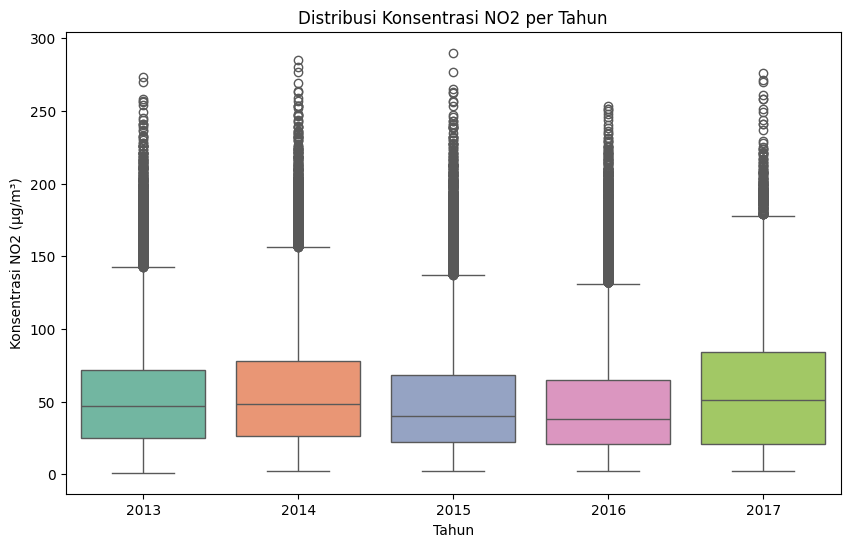

In [22]:
# Plot distribusi konsentrasi NO2 per tahun
plt.figure(figsize=(10,6))
sns.boxplot(x='year', y='NO2', data=all_df, palette="Set2")
plt.title('Distribusi Konsentrasi NO2 per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi NO2 (µg/m³)')
plt.show()


Pertanyaan 2:
Apakah ada korelasi antara suhu udara dan konsentrasi CO2?

Korelasi antara suhu udara dan konsentrasi CO:
          TEMP        CO
TEMP  1.000000 -0.324057
CO   -0.324057  1.000000


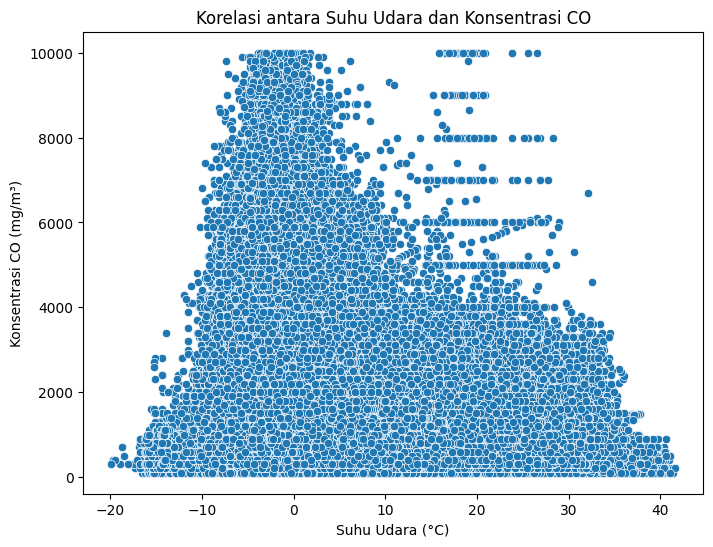

In [23]:
# Hitung korelasi antara suhu dan konsentrasi CO
correlation = all_df[['TEMP', 'CO']].corr()
print("Korelasi antara suhu udara dan konsentrasi CO:")
print(correlation)

# Visualisasi korelasi
plt.figure(figsize=(8,6))
sns.scatterplot(x='TEMP', y='CO', data=all_df)
plt.title('Korelasi antara Suhu Udara dan Konsentrasi CO')
plt.xlabel('Suhu Udara (°C)')
plt.ylabel('Konsentrasi CO (mg/m³)')
plt.show()
